<a href="https://colab.research.google.com/github/Henriquerezer/Machine_Learning/blob/main/Desafio_INDICIUM/gridsearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
caminho = '/content/yearly_wage_tratado'
treinoX = pd.read_csv(caminho)

caminho2 = '/content/wage_train.csv'
treinoy = pd.read_csv(caminho2)
treinoy['yearly_wage'] = treinoy['yearly_wage'].map({' <=50K': 1, ' >50K': 0})
treinoy = treinoy['yearly_wage']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(treinoX, treinoy, test_size = 0.3)

In [2]:
import numpy as np
# Pipeline, Gridsearch, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
# Plot the confusion matrix at the end of the tutorial
from sklearn.metrics import plot_confusion_matrix
# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm

In [12]:
pipe_lr = Pipeline([('LR', LogisticRegression(random_state=42))])
pipe_dt = Pipeline([('DT',DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('RF',RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('KNN', KNeighborsClassifier())])
pipe_svm = Pipeline([('SVM', svm.SVC(random_state=42))])
pipe_xgb = Pipeline([('XGB', XGBClassifier(random_state=42))])

In [13]:
param_range = [1, 2, 3, 4, 5, 6,]
param_range_fl = [1.5,1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]
lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear']}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[1:]}]
rf_param_grid = [{'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]}]
knn_param_grid = [{'KNN__n_neighbors': param_range,
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['euclidean', 'manhattan']}]
svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'], 
                    'SVM__C': param_range}]
xgb_param_grid = [{'XGB__learning_rate': learning_rates,
                    'XGB__max_depth': param_range,
                    'XGB__min_child_weight': param_range[:2],
                    'XGB__subsample': param_range_fl,
                    'XGB__n_estimators': n_estimators}]



In [14]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='accuracy',
        cv=3)
dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='accuracy',
        cv=3)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='accuracy',
        cv=3)
knn_grid_search = GridSearchCV(estimator=pipe_knn,
        param_grid=knn_param_grid,
        scoring='accuracy',
        cv=3)
svm_grid_search = GridSearchCV(estimator=pipe_svm,
        param_grid=svm_param_grid,
        scoring='accuracy',
        cv=3)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
        param_grid=xgb_param_grid,
        scoring='accuracy',
        cv=3)

In [15]:
grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search, svm_grid_search, xgb_grid_search]
for pipe in grids:
    pipe.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
324 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/tr

In [16]:
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'K-Nearest Neighbors', 
             4: 'Support Vector Machines', 5: 'XGBoost'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i],          model.best_params_))

Logistic Regression Test Accuracy: 0.846949221949222
Logistic Regression Best Params: {'LR__C': 1.0, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Decision Trees Test Accuracy: 0.8463349713349714
Decision Trees Best Params: {'DT__criterion': 'gini', 'DT__max_depth': 6, 'DT__min_samples_leaf': 1, 'DT__min_samples_split': 3}
Random Forest Test Accuracy: 0.8447993447993448
Random Forest Best Params: {'RF__max_depth': 6, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 6}
K-Nearest Neighbors Test Accuracy: 0.822993447993448
K-Nearest Neighbors Best Params: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5, 'KNN__weights': 'uniform'}
Support Vector Machines Test Accuracy: 0.8504299754299754
Support Vector Machines Best Params: {'SVM__C': 6, 'SVM__kernel': 'linear'}
XGBoost Test Accuracy: 0.8712121212121212
XGBoost Best Params: {'XGB__learning_rate': 0.1, 'XGB__max_depth': 5, 'XGB__min_child_weight': 1, 'XGB__n_estimators': 150, 'XGB__subsample': 1.0}


In [20]:
 print('Melhor modelo com melhores hiperparâmetros',model.best_params_)
 print('Accuracy melhor modelo: ', model.best_score_ )

Melhor modelo com melhores hiperparâmetros {'XGB__learning_rate': 0.1, 'XGB__max_depth': 5, 'XGB__min_child_weight': 1, 'XGB__n_estimators': 150, 'XGB__subsample': 1.0}
Accuracy melhor modelo:  0.8705687278666879


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


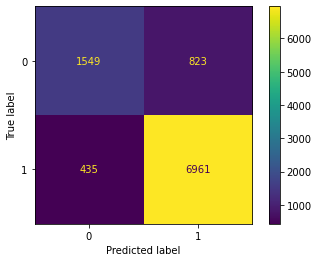

In [17]:
plot_confusion_matrix(xgb_grid_search, X_test, y_test)